# Single barplot [^download]

[^download]: This notebook can be downloaded as **{nb-download}`example_single_barplot.ipynb`**.

This example shows how to create a barplot provided a yaml configuration file and a result csv.

In [2]:
import matplotlib.pyplot as plt
from pathlib import Path
from pandas import Timedelta
from pandas.tseries import frequencies

from post_processing.dataclass.data_aplose import DataAplose

yaml_file = Path(r"_static/APOCADO_yaml.yml")
data = DataAplose.from_yaml(file=yaml_file)

The `DataAplose` object has informations about the loaded result csv.

In [ ]:
print(f"{' DataAplose object ':#^70}")
print(f"{'Begin:':<30}{str(data.begin):>40}")
print(f"{'End:':<30}{str(data.end):>40}")
print(f"{'Annotators:':<30}{str((', ').join(data.annotators)):>40}")
print(f"{'Labels:':<10}{str((', ').join(data.labels)):>60}")
print(f"{'Dataset:':<30}{str((', ').join(data.dataset)):>40}")

## Basic usage

First, configure the figure to be plotted:
- Create a new Matplotlib figure and a single set of axes,
- Define `bin_size`, the duration of each bar of the plot (must be a `pandas.Timedelta` or a `BaseOffset`),
- Define `ticks`, the x-axis tick frequency (must be a `pandas.Timedelta` or a `BaseOffset`),
- Define `fmt`, the string representation of time on x-axis,
- Use `set_ax` method from `DataAplose` class to configure the figure and axes.

Finally, use `plot` method from `DataAplose` class with `mode` argument set to `"histogram"` and select an appropriate `annotator` and `label`.

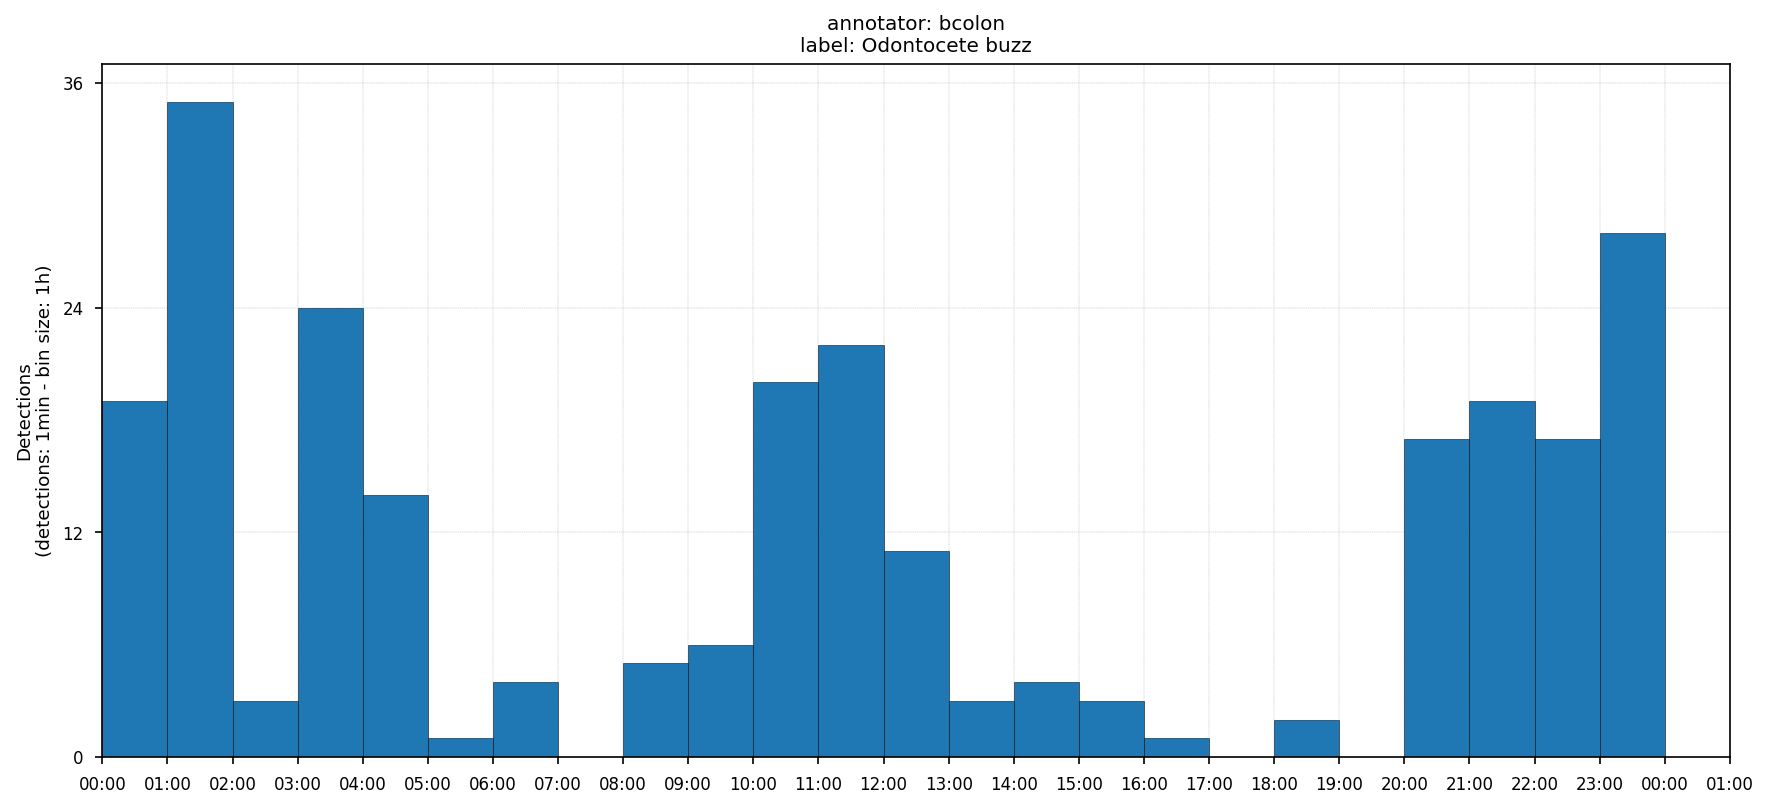

In [14]:
fig, ax = plt.subplots(1, 1)
bin_size = Timedelta("1h")
ticks = Timedelta("1h")
fmt = "%H:%M"

ax = data.set_ax(ax=ax, x_ticks_res=ticks, date_format=fmt)
data.plot(
    mode="histogram",
    annotator=data.annotators[0],
    label=data.labels[0],
    ax=ax,
    bin_size=bin_size,
)
plt.show()

In this second example, `bin_size` and `ticks` are defined using `BaseOffset` objects.

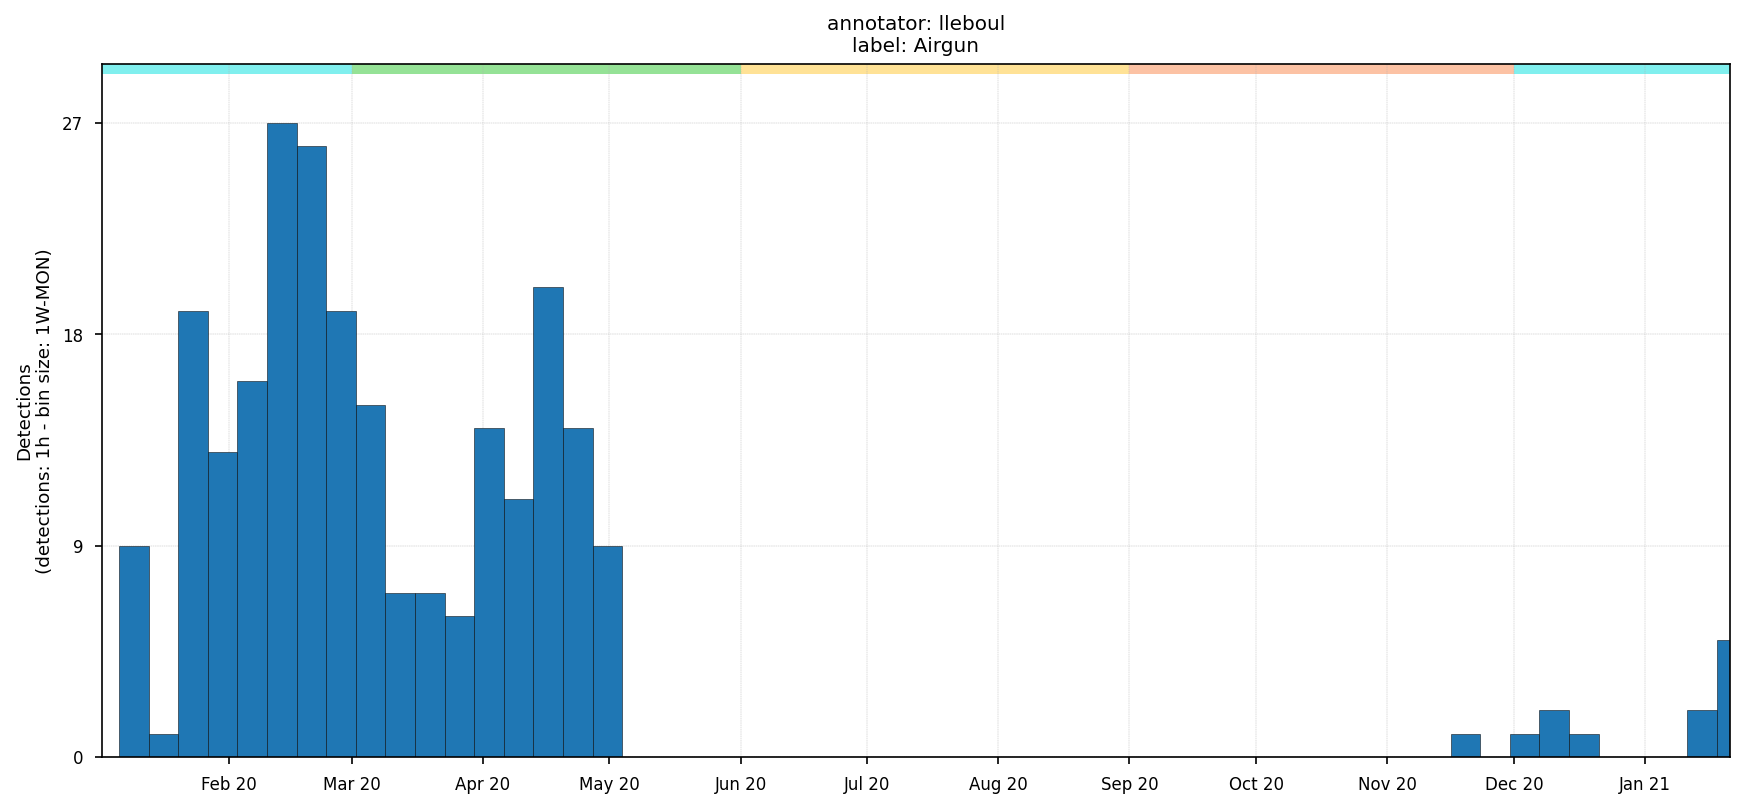

In [12]:
yaml_file = Path(r"_static/OHASISBIO_yaml.yml")
data = DataAplose.from_yaml(file=yaml_file, concat=True)
data.coordinates = (0,0)

fig, ax = plt.subplots(1, 1)
bin_size = frequencies.to_offset("1W-MON")
ticks = frequencies.to_offset("1MS")
fmt = "%b %y"
ax = data.set_ax(ax=ax, x_ticks_res=ticks, date_format=fmt)

data.plot(
    mode="histogram",
    annotator=data.annotators[0],
    label=data.labels[0],
    ax=ax,
    bin_size=bin_size,
    season=True
)
plt.show()

```{note}
Season is displayed on the plot as `season` argument in `plot` method is passed as `True`.\
For seasons to be displayed, the `DataAplose` object must have coordinates.

## Advanced usage

This example shows how several barplot can be manipulated and joined together in a single `matplotlib` figure.

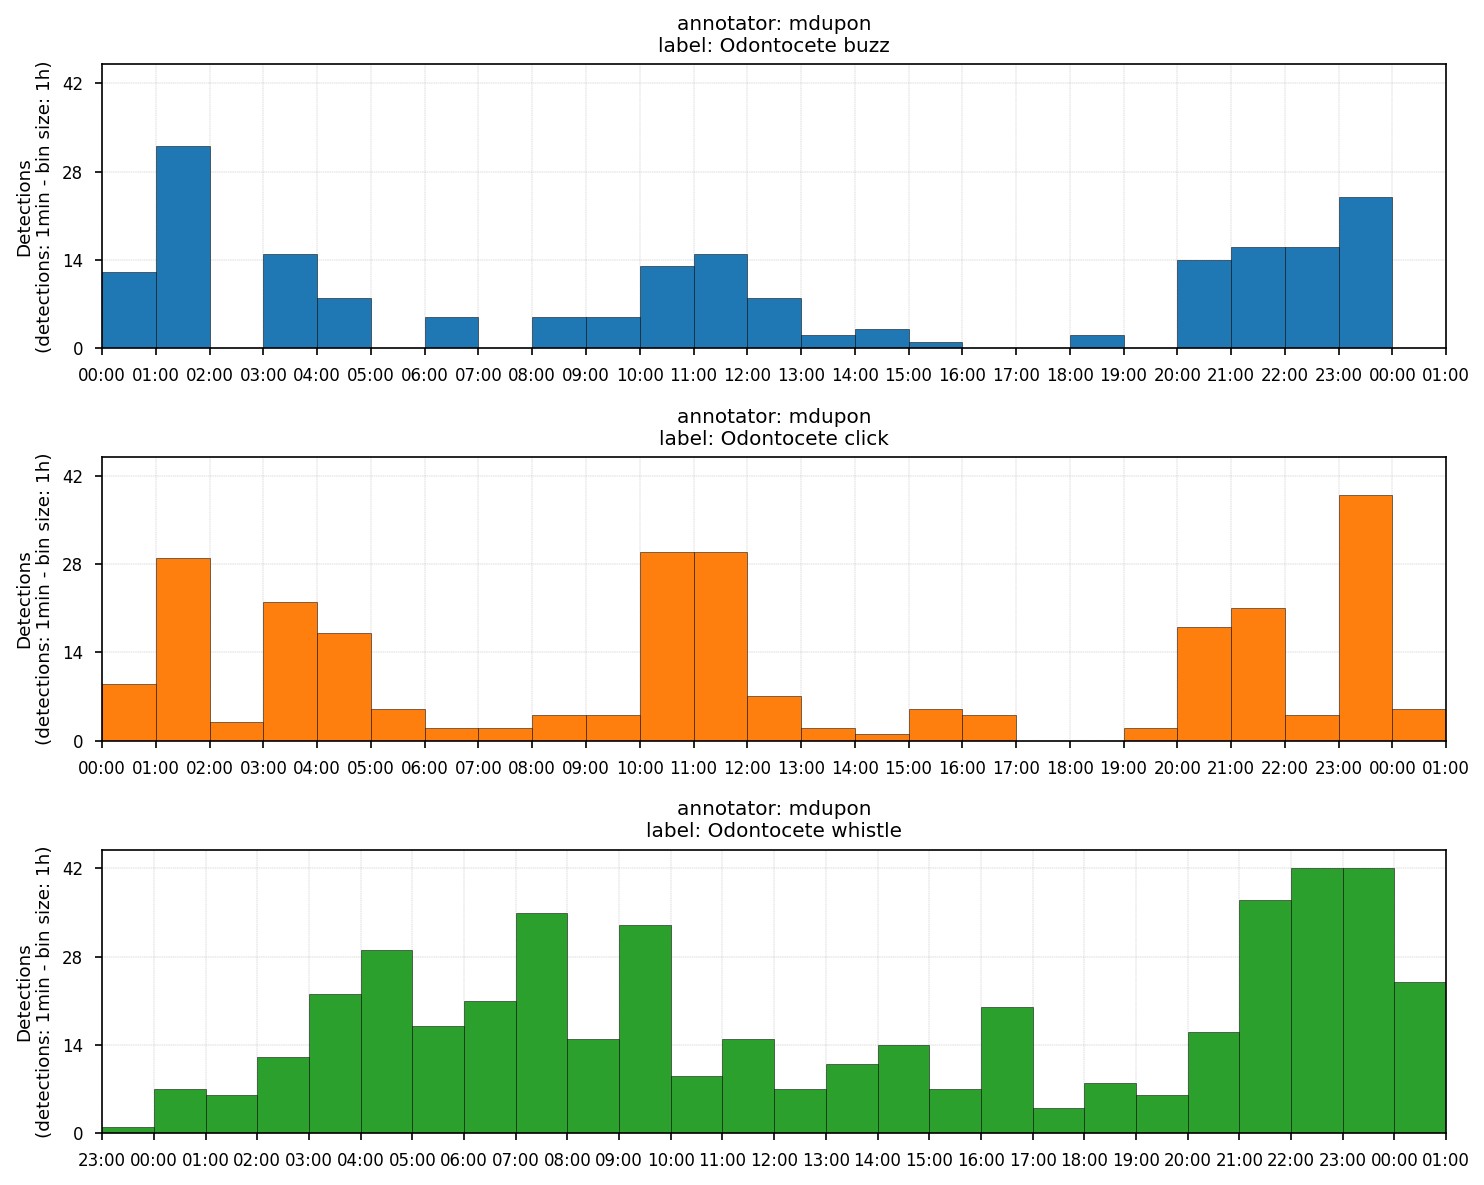

In [53]:
yaml_file = Path(r"_static/APOCADO_yaml.yml")
data = DataAplose.from_yaml(file=yaml_file)

fig, axs = plt.subplots(3, 1, figsize=(10,8), sharey=True)
bin_size = Timedelta("1h")
ticks = Timedelta("1h")
fmt = "%H:%M"
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

y_max = 0
for i in range(len(data.labels)):
    axs[i] = data.set_ax(ax=axs[i], x_ticks_res=ticks, date_format=fmt)
    data.plot(
        mode="histogram",
        annotator=data.annotators[1],
        label=data.labels[i],
        ax=axs[i],
        bin_size=bin_size,
        color=colors[i],
    )
    y_max = axs[i].get_ylim()[1] if axs[i].get_ylim()[1] > y_max else y_max

for ax in axs:
    ax.set_ylim(0, y_max)

plt.tight_layout()
plt.show()